# Predictive Analytics for Flood Risk Prediction


---


Reni Kartika Suwandi

renisuwandi1011@gmail.com



--- ---



 # Deskripsi Proyek

### Latar Belakang
Banjir merupakan salah satu bencana alam paling sering terjadi di seluruh dunia, dan menyebabkan kerugian besar secara ekonomi, kerusakan infrastruktur, hingga korban jiwa. Menurut World Meteorological Organization (WMO) dan United Nations Office for Disaster Risk Reduction (UNDRR), banjir menyumbang lebih dari 40% dari seluruh kejadian bencana hidrometeorologi setiap tahun secara global. Dengan meningkatnya variabilitas iklim dan perubahan tata guna lahan, risiko banjir semakin sulit diprediksi secara manual.

Sebagai respons terhadap tantangan ini, pemanfaatan teknologi data science dan machine learning dapat membantu dalam membangun sistem prediksi yang mampu mengidentifikasi kemungkinan terjadinya banjir berdasarkan data historis dan lingkungan. Proyek ini bertujuan untuk mengembangkan model prediktif menggunakan beberapa algoritma machine learning dan mengevaluasi performanya secara komparatif.

## 1. Import Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from scipy.stats import skew, kurtosis
import kagglehub
from kagglehub import KaggleDatasetAdapter
import zipfile
import os


# Model yang akan digunakan
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 2. Data Understanding


### 2.1 Data Loading

#### **Informasi Dataset**


| **Informasi**           | **Detail**                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **Nama Dataset**        | Flood Prediction Dataset                                                   |
| **Pembuat**             | Naiya Khalid                                                               |
| **Platform**            | [Kaggle](https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset) |
| **Tahun Pembuatan**     | Sekitar 2024 *(berdasarkan waktu unggahan terakhir)*                       |
| **Deskripsi Asal Data** | Tidak disebutkan secara eksplisit                                          |
| **Sumber Data**         | Tidak dijelaskan                                                           |
| **Lisensi**             | Tidak tercantum secara jelas di halaman dataset                            |
| **Fitur Dataset**       | 22 fitur input + 1 label target (`FloodProbability`)                       |
| **Tujuan Dataset**      | Prediksi kemungkinan banjir berdasarkan faktor-faktor lingkungan dan sosial|


### **Load Dataset**

In [2]:
# Download dataset dari KaggleHub
path = kagglehub.dataset_download("naiyakhalid/flood-prediction-dataset")
print("Path to dataset files:", path)

# Cek isi folder (opsional untuk memastikan nama file)
print("File dalam folder:", os.listdir(path))

# Gunakan nama file CSV yang benar sesuai dataset
csv_file = os.path.join(path, "flood.csv")

# Baca dataset ke dalam DataFrame
df = pd.read_csv(csv_file)

# Tampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
print(df.head())


100%|██████████| 680k/680k [00:00<00:00, 23.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/naiyakhalid/flood-prediction-dataset/versions/1
File dalam folder: ['flood.csv']


5 Baris Pertama Dataset:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystem

## **2.2 Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) atau Analisis Data Eksploratif adalah tahap penting dalam proses analisis data dan machine learning, yang bertujuan untuk memahami struktur, karakteristik, dan pola dalam data sebelum membangun model.

### **2.2.1 Informasi Dasar Data**

In [3]:
# Info dasar
print(" Shape:", df.shape)
print("\n First 5 rows:")
print(df.head())

 Shape: (50000, 21)

 First 5 rows:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  Dra

**Insight**:  Terdapat 50.000 baris (observasi) dan 21 kolom (fitur).

In [4]:
# Tipe Data
print("\n Info:")
print(df.info())


 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVul

**Insight**:
- Setiap kolom memiliki tepat 50.000 entri (non-null),
- 20 fitur bertipe int64 (bilangan bulat), mewakili skor atau indeks kondisi.
- 1 target FloodProbability bertipe float64

In [5]:
# Statistik Deskriptif
print("\n Descriptive statistics:")
print(df.describe(include='all'))


 Descriptive statistics:
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642   
mi

**Insight**:
- Distribusi fitur	Umumnya simetris, mean ≈ median
- Nilai ekstrem	Ada potensi outlier di beberapa fitur (nilai max jauh di atas Q3)
- FloodProbability target	Distribusi sempit dan mendekati normal
- Penyebaran data	Mayoritas data terkonsentrasi di nilai tengah (3–6)
- Kebutuhan scaling	Ya, karena skala nilai fitur bervariasi

### **2.2.2 Data hilang**

In [6]:
# Jumlah nilai kosong
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])


Missing Values:
Series([], dtype: int64)


**Insight**: Tidak ada missing value (nilai hilang) dalam dataset

### **2.2.3 Data Duplikat**

In [7]:
# Cek duplikat
print("\nDuplicate Rows:", df.duplicated().sum())
# Hapus jika ada
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


**Insight**: Tidak ada (nilai duplicate) dalam dataset

2.2.3 Data Unik

In [8]:
# Jumlah nilai unik per kolom
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values per Column:
MonsoonIntensity: 17 unique values
TopographyDrainage: 18 unique values
RiverManagement: 17 unique values
Deforestation: 18 unique values
Urbanization: 18 unique values
ClimateChange: 18 unique values
DamsQuality: 17 unique values
Siltation: 17 unique values
AgriculturalPractices: 17 unique values
Encroachments: 18 unique values
IneffectiveDisasterPreparedness: 17 unique values
DrainageSystems: 18 unique values
CoastalVulnerability: 18 unique values
Landslides: 17 unique values
Watersheds: 17 unique values
DeterioratingInfrastructure: 18 unique values
PopulationScore: 18 unique values
WetlandLoss: 19 unique values
InadequatePlanning: 17 unique values
PoliticalFactors: 17 unique values
FloodProbability: 83 unique values


**Insight:**
- Sebagian besar fitur	17–19	Diskret, kemungkinan skala ordinal. Bisa digunakan dalam regresi & klasifikasi.

- FloodProbability	83	Target numerik kontinu → regresi.

- FloodLabel	2	Target kategorikal biner - klasifikasi.

- PoliticalFactors	11	Relatif rendah cek signifikansi/korelasi.


### **2.2.4 Distribusi Target Variabel**

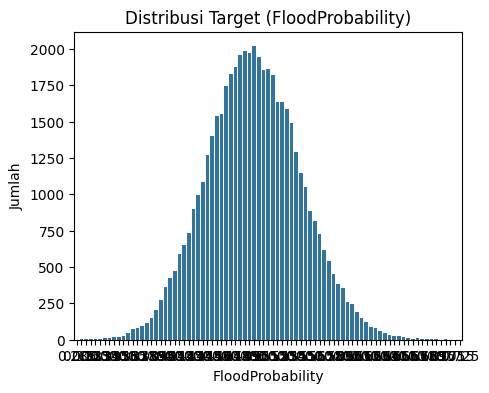


Rasio Kelas:
 FloodProbability
0.500    0.04036
0.490    0.03968
0.495    0.03950
0.485    0.03920
0.505    0.03890
          ...   
0.710    0.00002
0.700    0.00002
0.715    0.00002
0.285    0.00002
0.725    0.00002
Name: proportion, Length: 83, dtype: float64


In [9]:
# Membuat plot Distribusi
plt.figure(figsize=(5,4))
sns.countplot(x='FloodProbability', data=df)
plt.title('Distribusi Target (FloodProbability)')
plt.xlabel('FloodProbability')
plt.ylabel('Jumlah')
plt.show()

# Rasio kelas
class_ratio = df['FloodProbability'].value_counts(normalize=True)
print("\nRasio Kelas:\n", class_ratio)


**Insight**:
- Kondisi dengan rasio kelas mendekati 0.5 memiliki probabilitas banjir tertinggi, meskipun nilainya masih kecil.

- Rasio kelas yang terlalu tinggi atau terlalu rendah menunjukkan risiko banjir yang hampir nihil.

### **2.2.4 Distribusi Fitur Numerik**

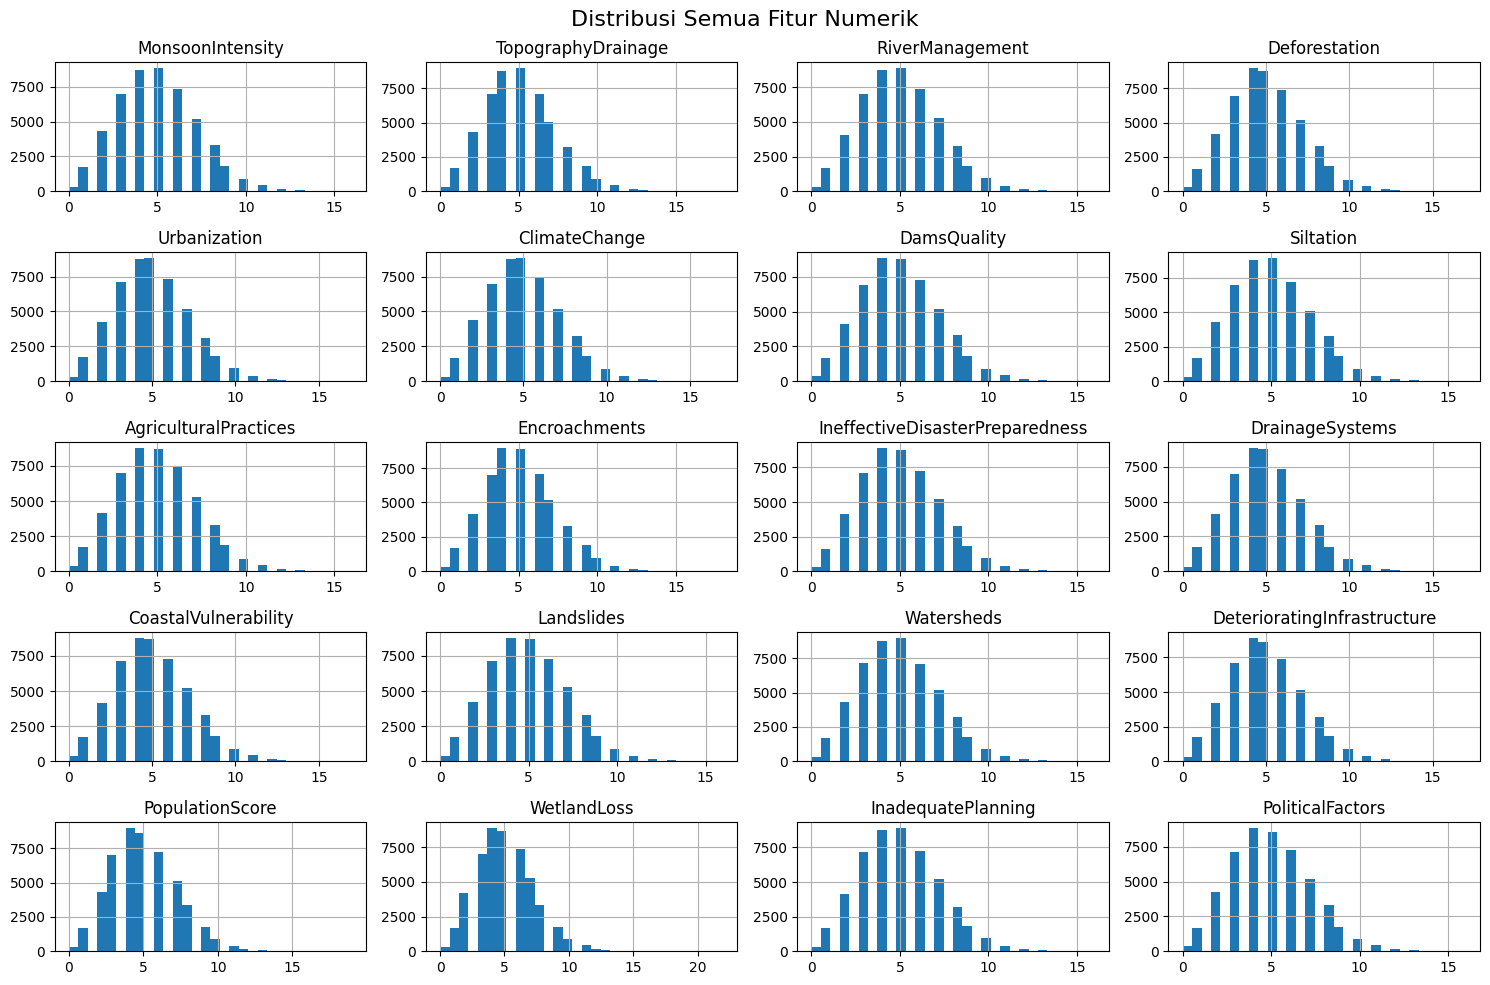

In [10]:
# fitur numerik
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('FloodProbability')  # Kecuali target

# Histogram untuk semua fitur numerik
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribusi Semua Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**  
- Sebagian besar fitur memiliki distribusi yang seragam dan terkonsentrasi pada nilai rendah, menunjukkan bahwa kondisi alam dan manusia di banyak lokasi masih relatif stabil atau tidak terlalu ekstrem.

- Faktor-faktor seperti `WetlandLoss` dan `Deforestation` tampaknya memiliki potensi dampak yang lebih besar dibandingkan dengan fitur lainnya, karena mereka memiliki variasi yang lebih luas.


### **2.2.5 Outlier dan Penaganan Outlier**

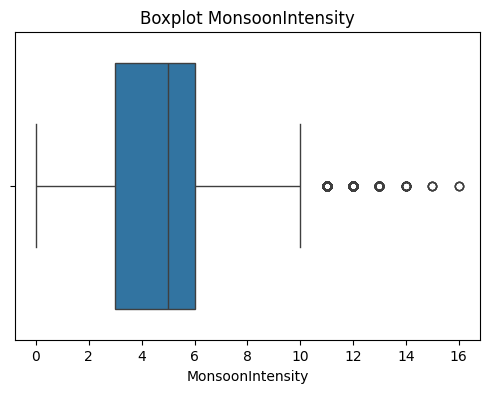

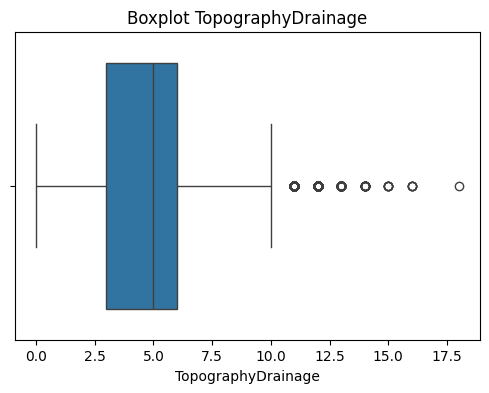

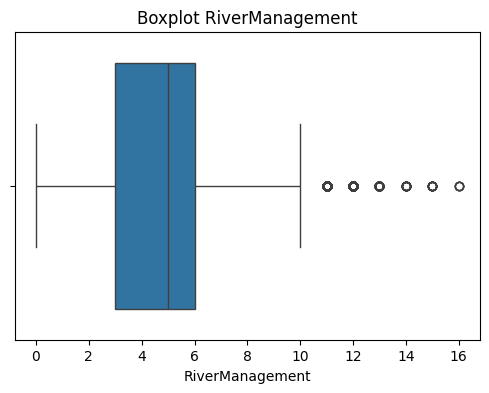

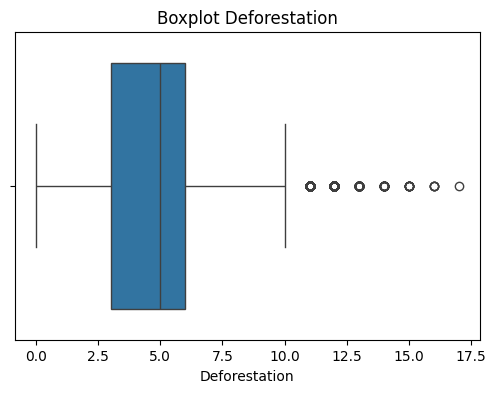

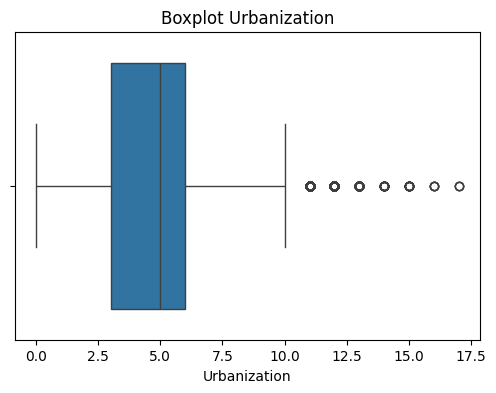

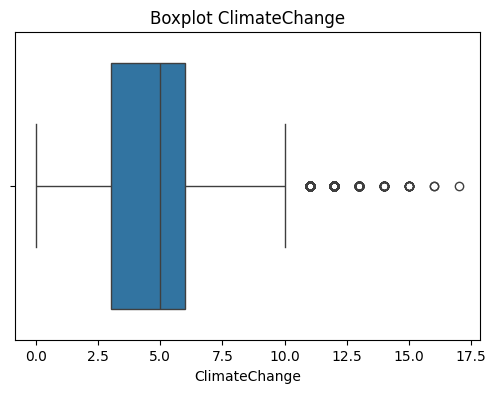

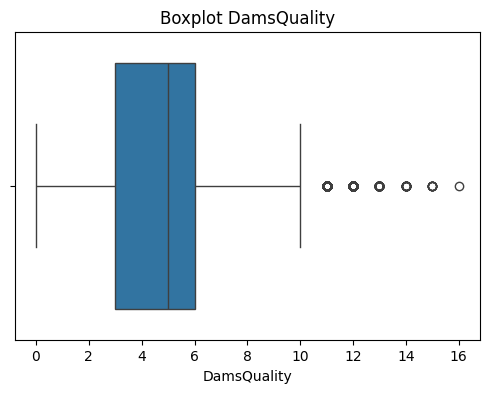

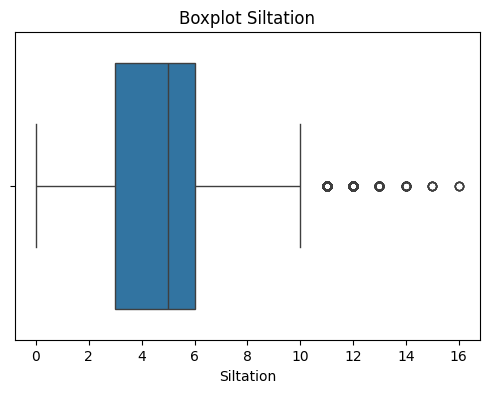

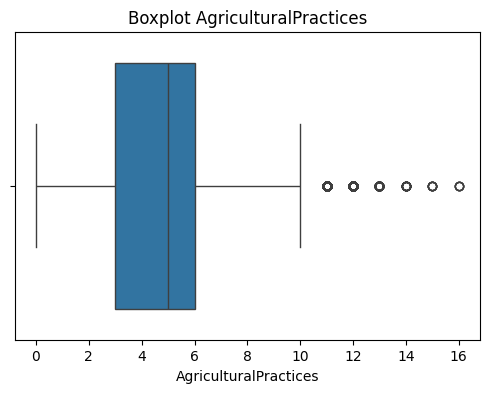

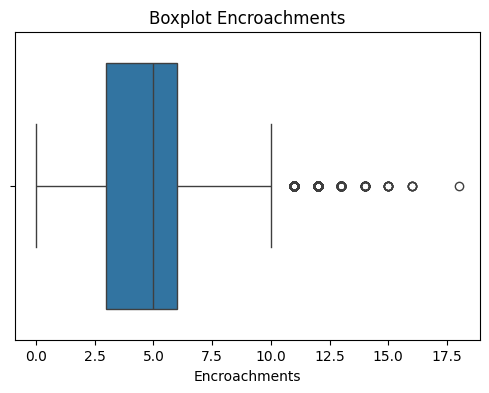

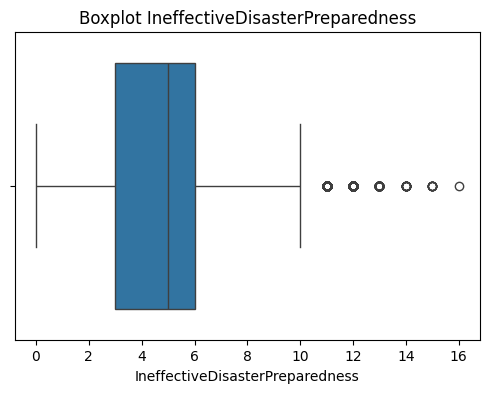

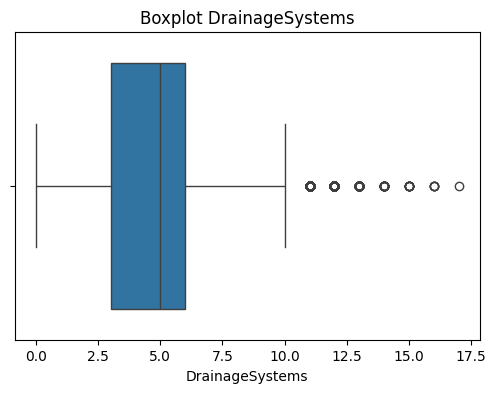

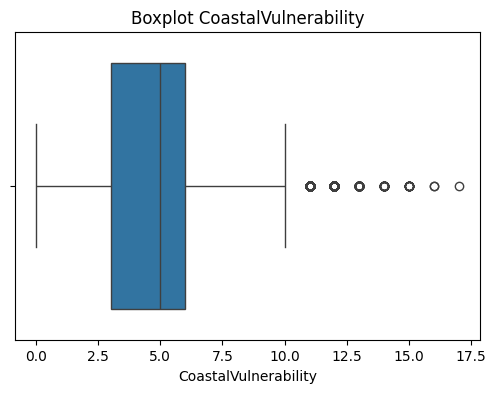

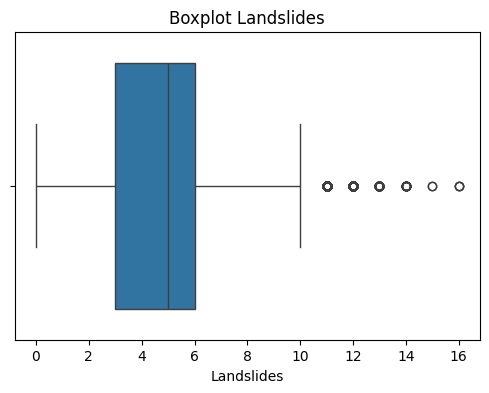

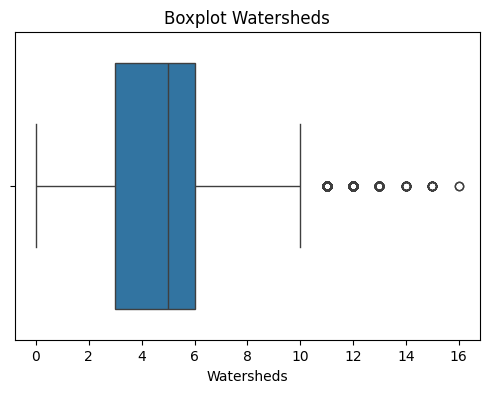

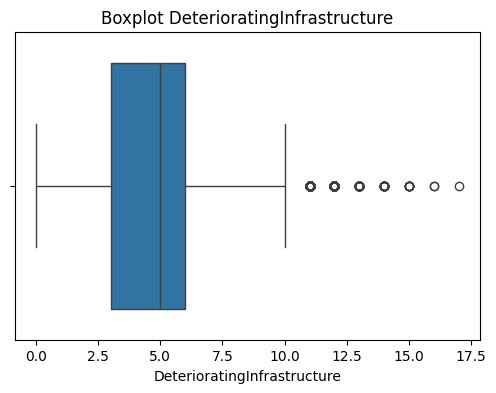

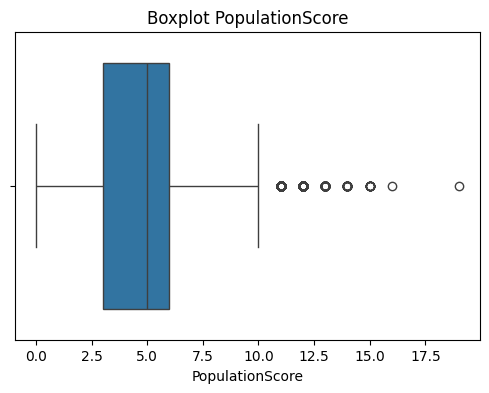

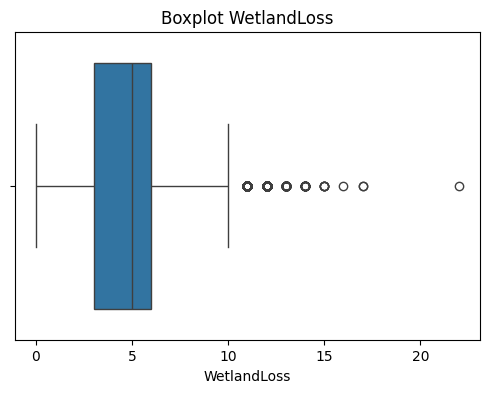

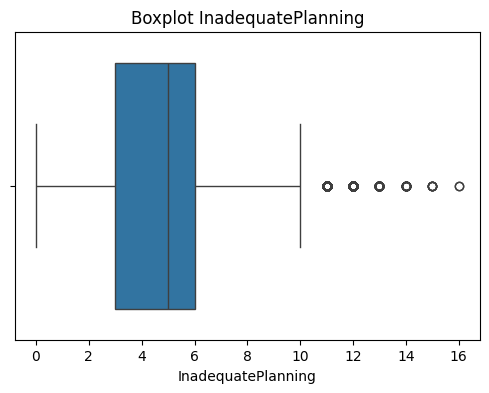

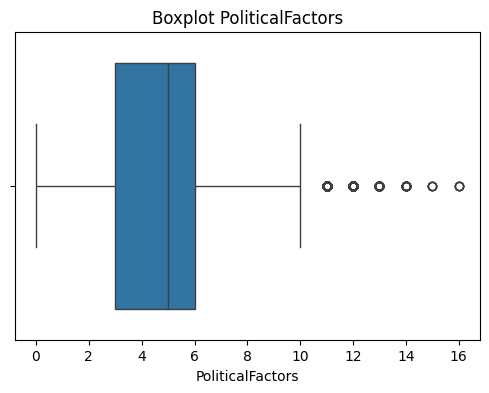

In [11]:
# Cek Outlier
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

**Menangani outlier**
- Q1 (Kuartil 1): Nilai di bawah 25% data berada.
- Q3 (Kuartil 3): Nilai di bawah 75% data berada.
- Bersama-sama, Q1 dan Q3 membentuk rentang tengah data.
- IQR = Q3 - Q1 → mengukur sebaran data tengah (middle 50%), Ini digunakan untuk memahami variabilitas data dan mendeteksi nilai yang terlalu jauh dari pusat data.

In [12]:
# Mengani Outlier
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

### **2.2.6 Korelasi Antar Variabel**

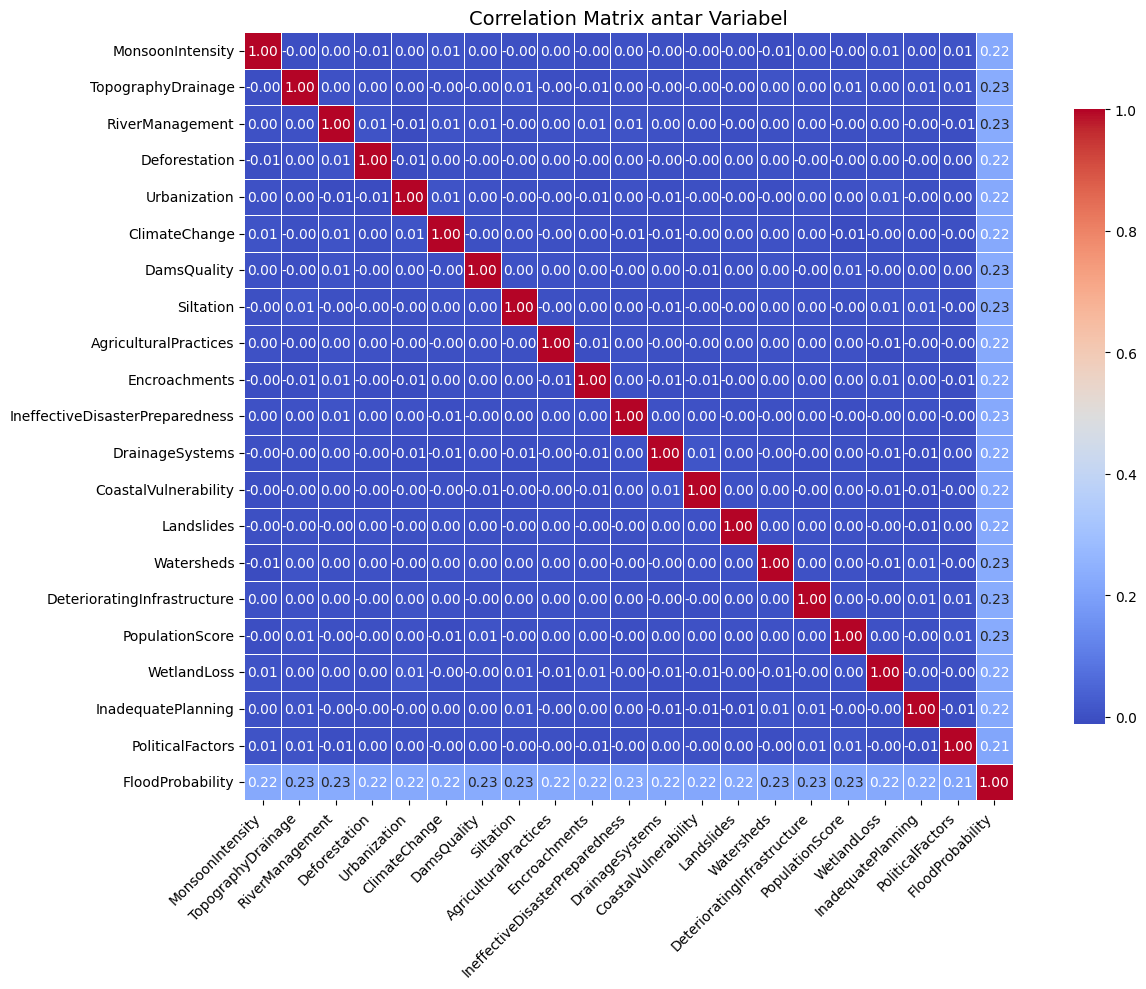

In [13]:
# Ukuran figure yang lebih besar, disesuaikan dengan jumlah fitur
plt.figure(figsize=(14, 10))

# Buat heatmap
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths= 0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix antar Variabel", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Biar label tidak terpotong
plt.show()

### **2.2.8 Perbandingan Statistik Fitur per Kelas**

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


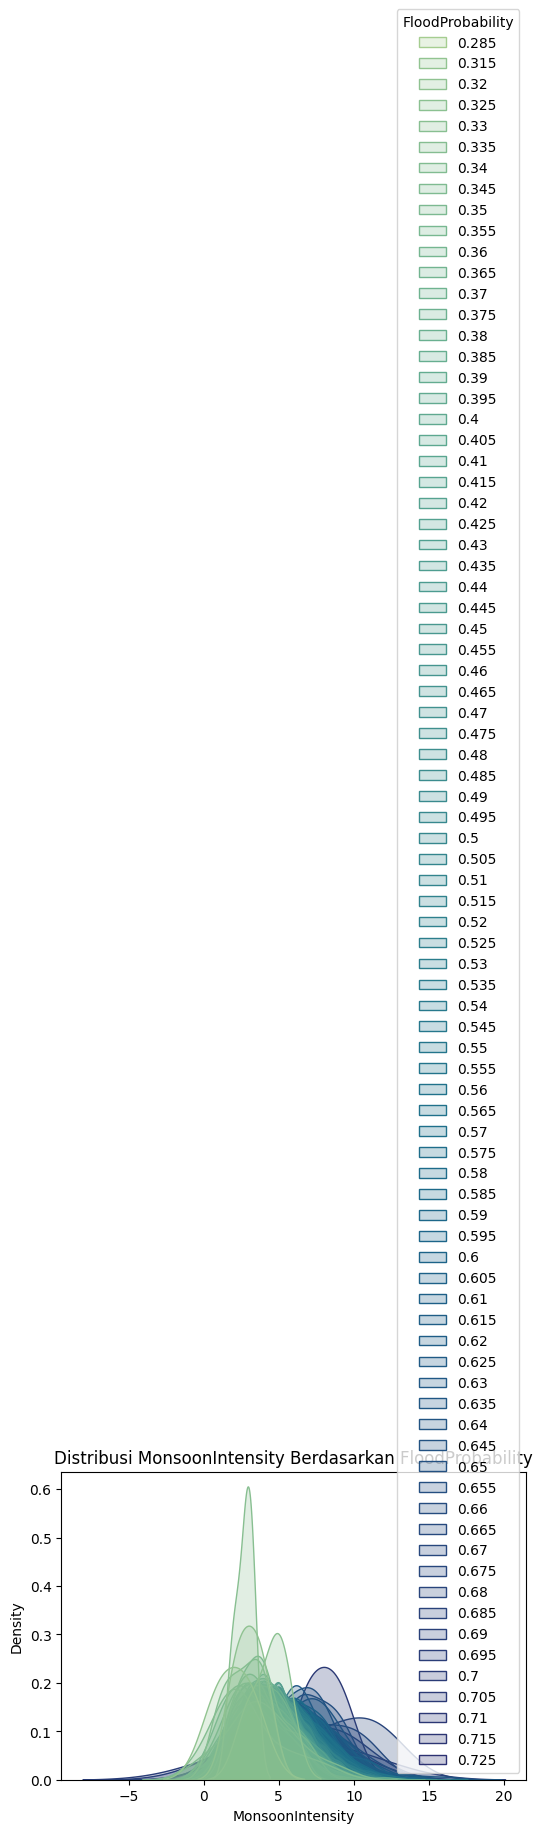

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


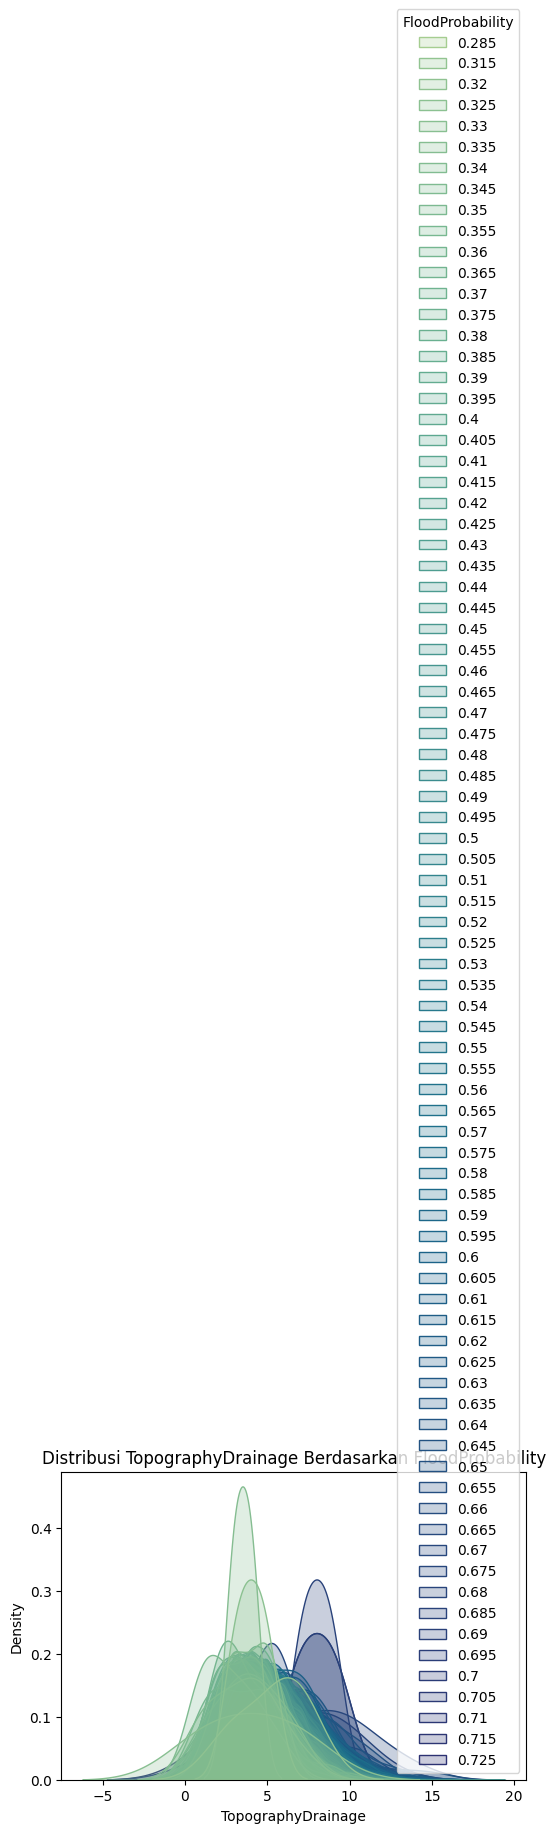

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


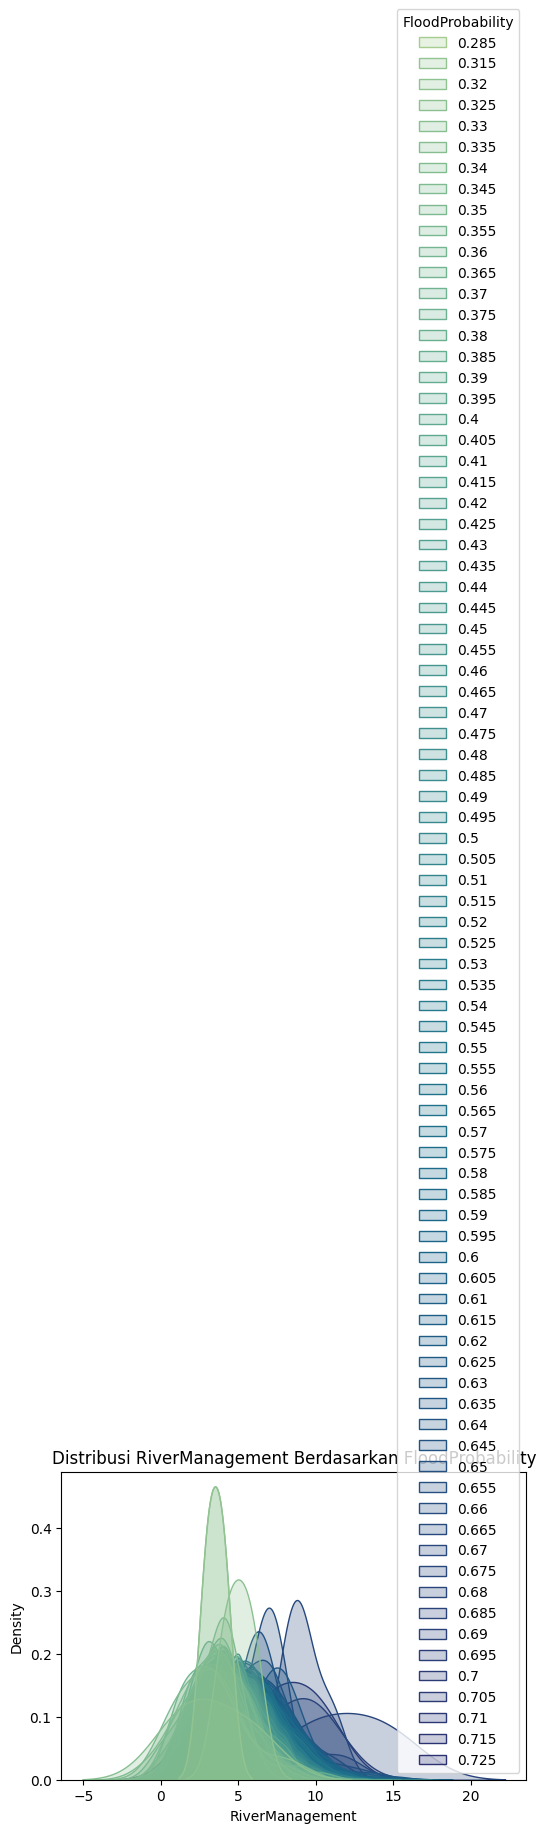

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


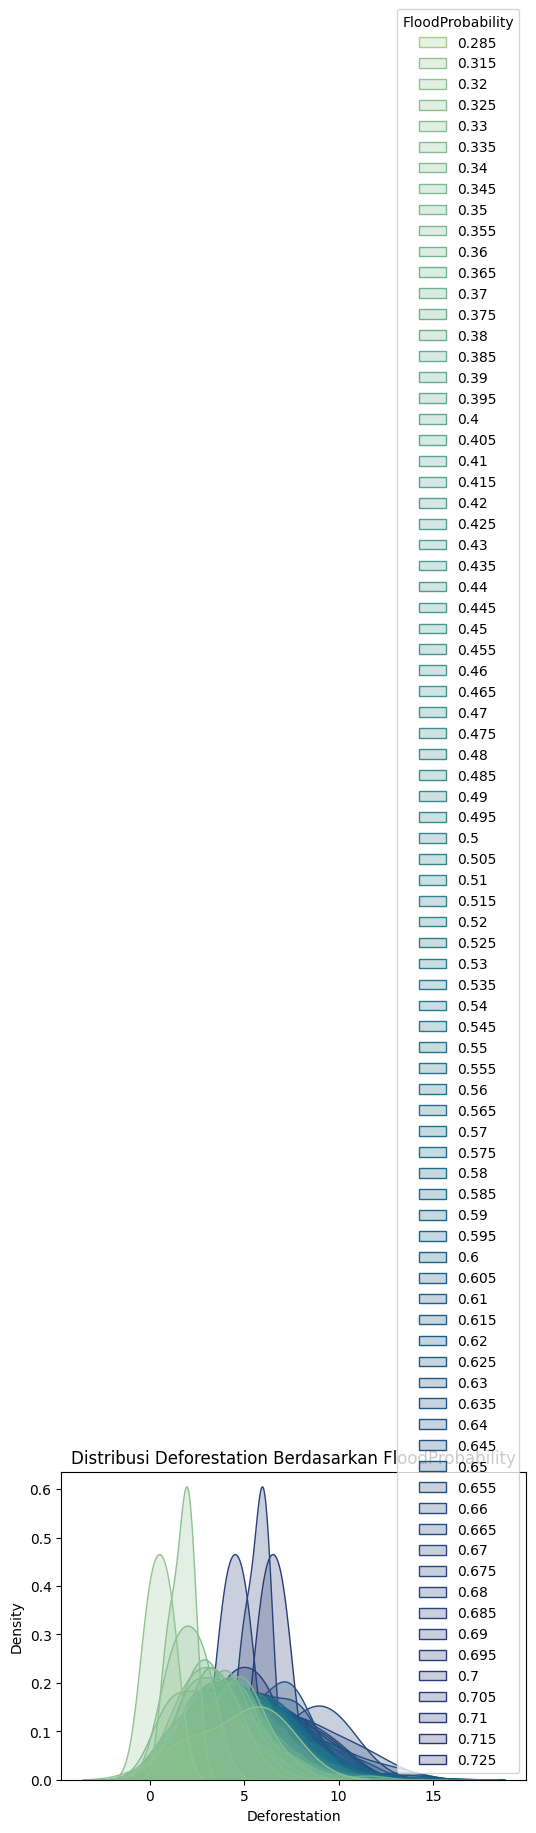

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


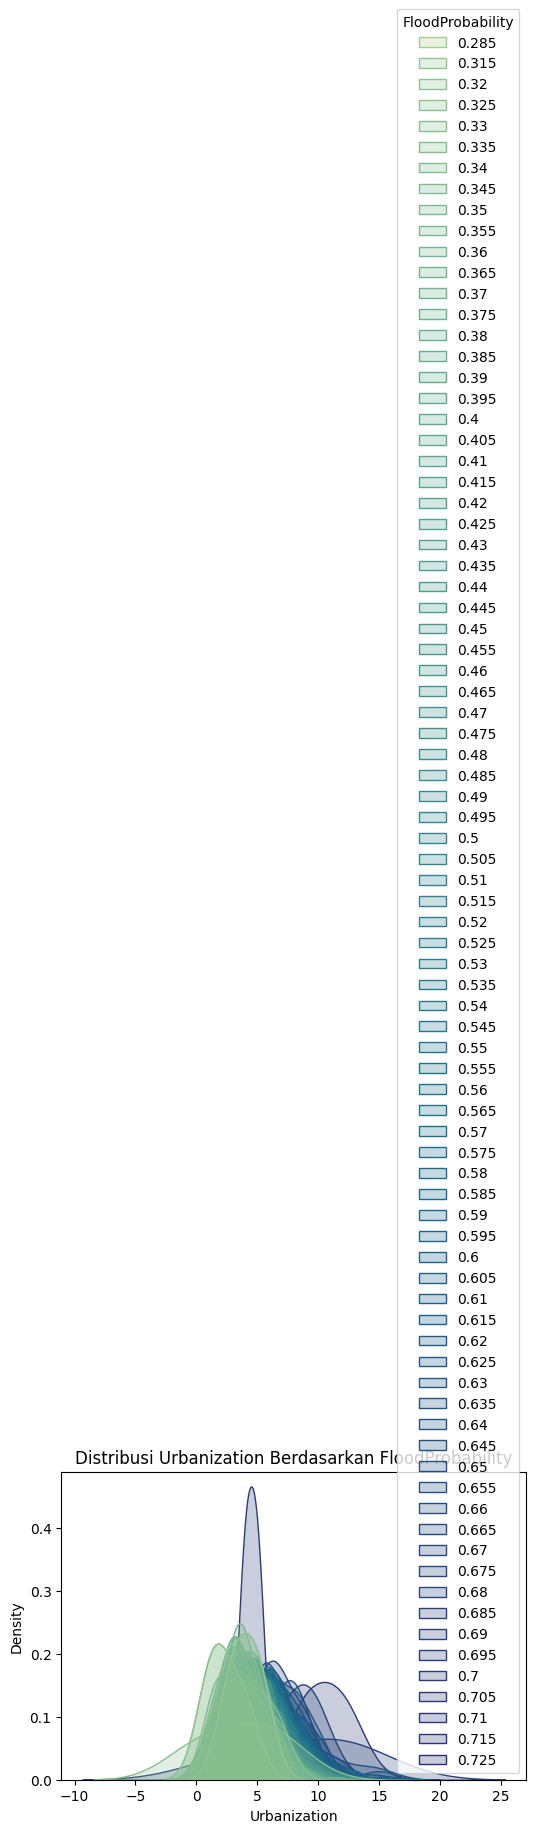

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


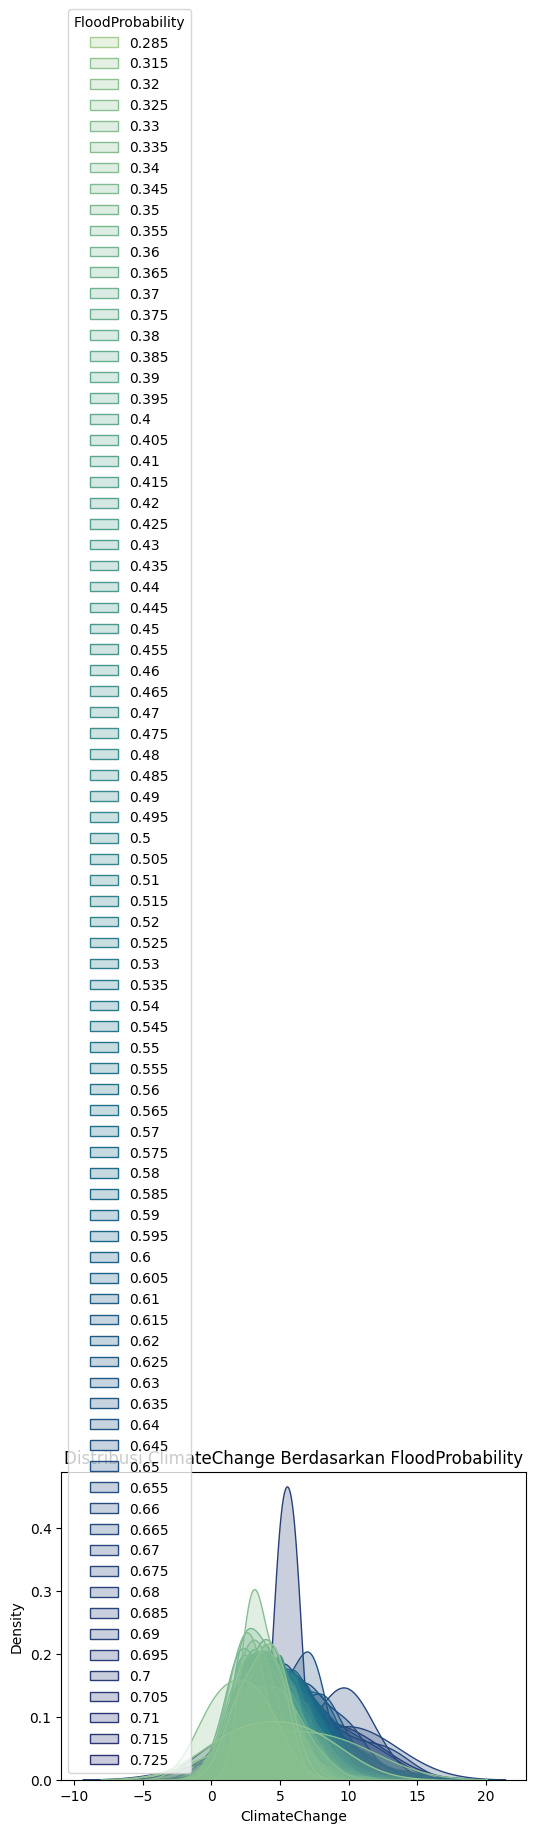

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


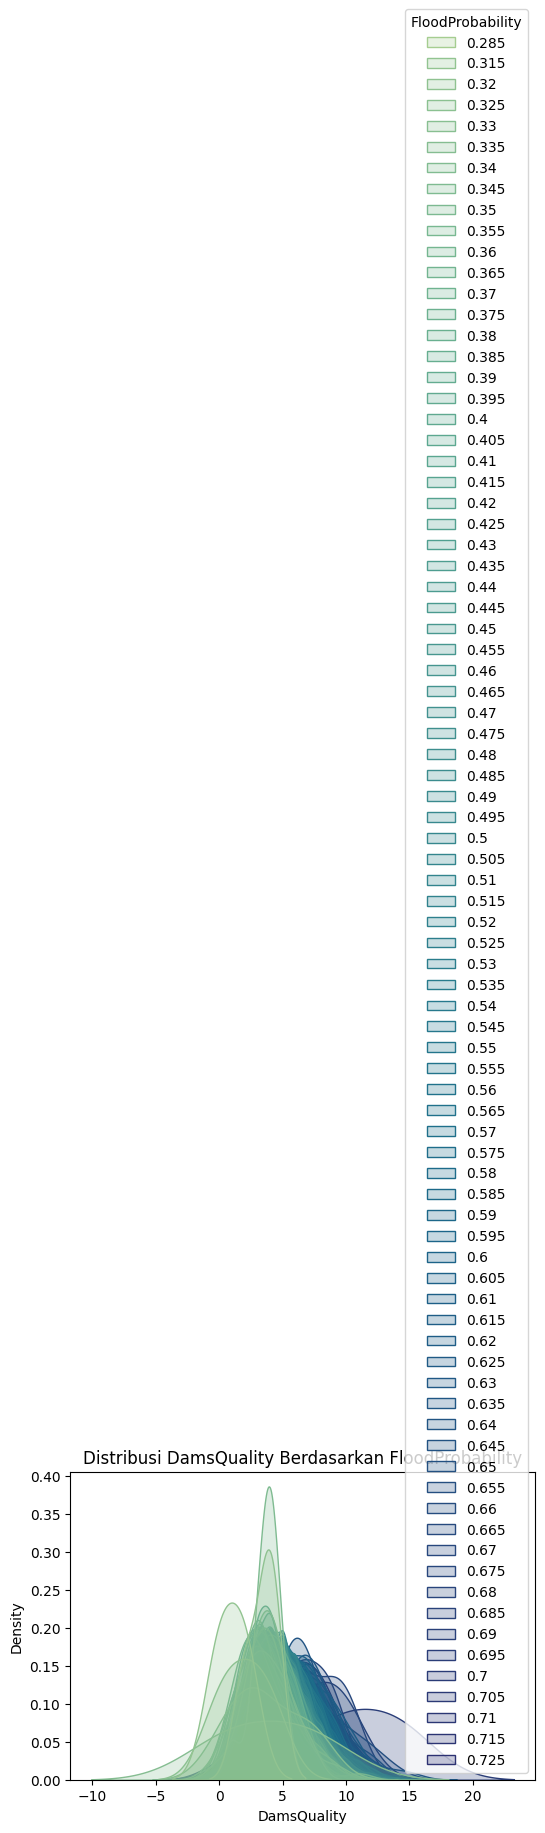

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


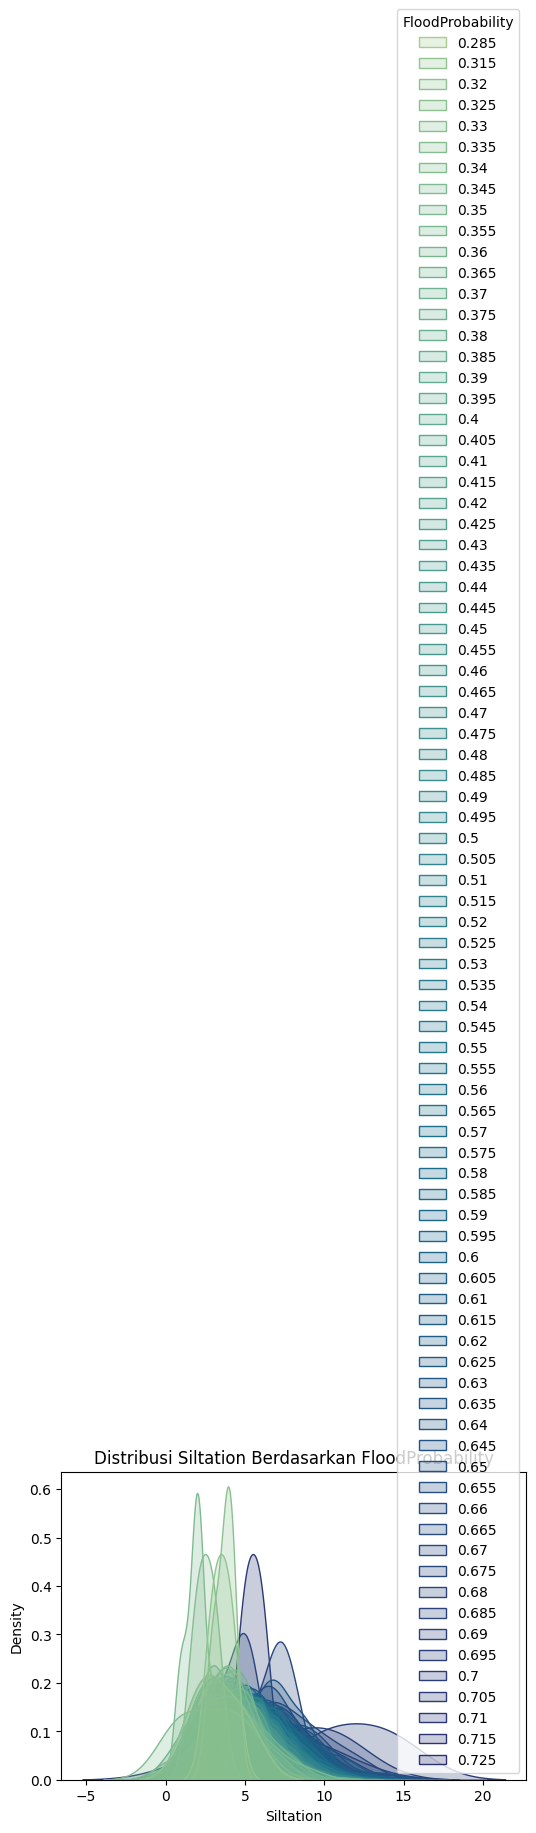

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


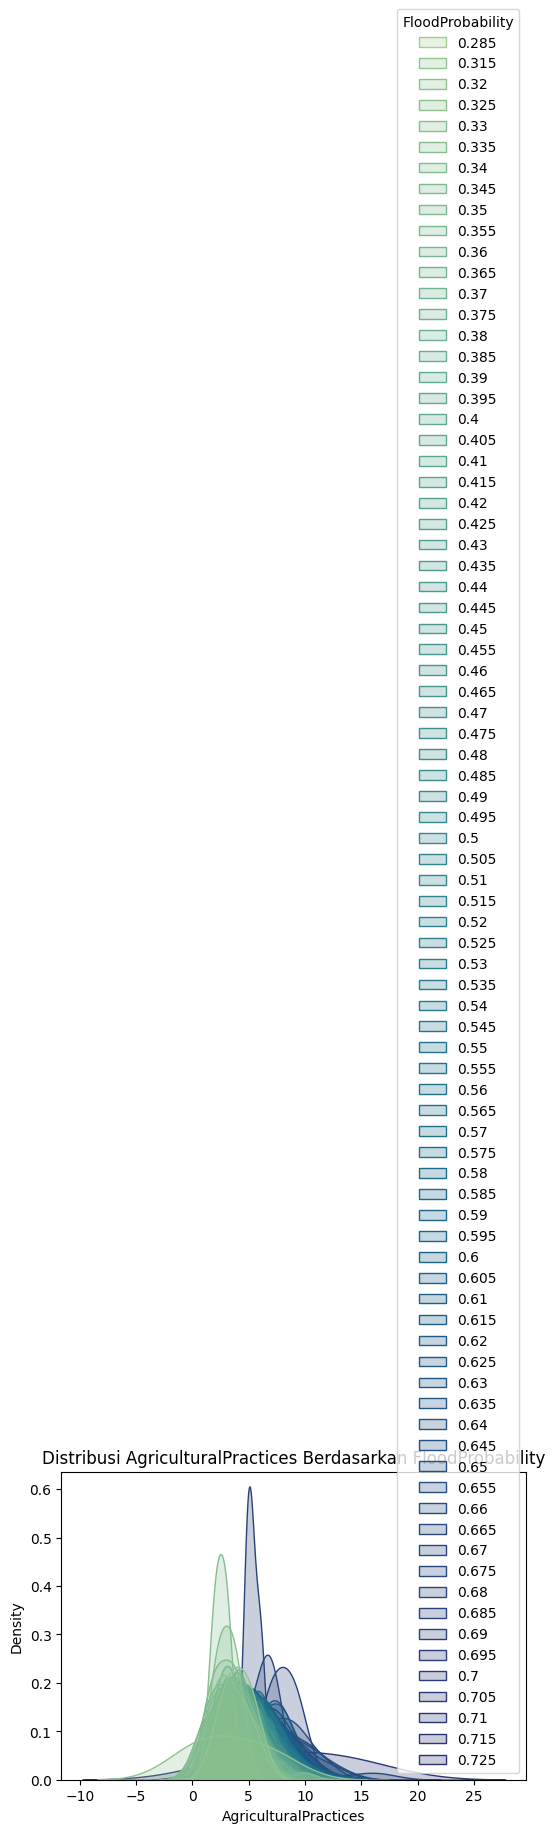

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


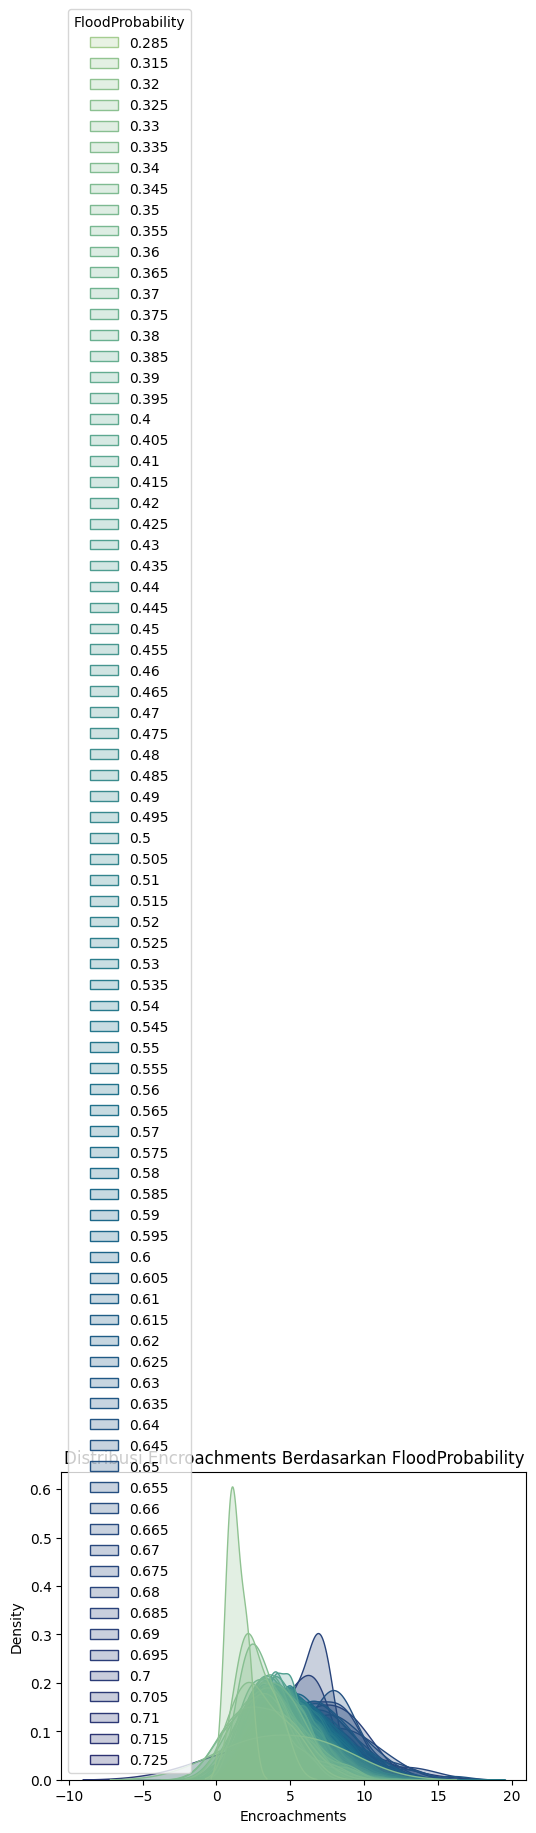

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


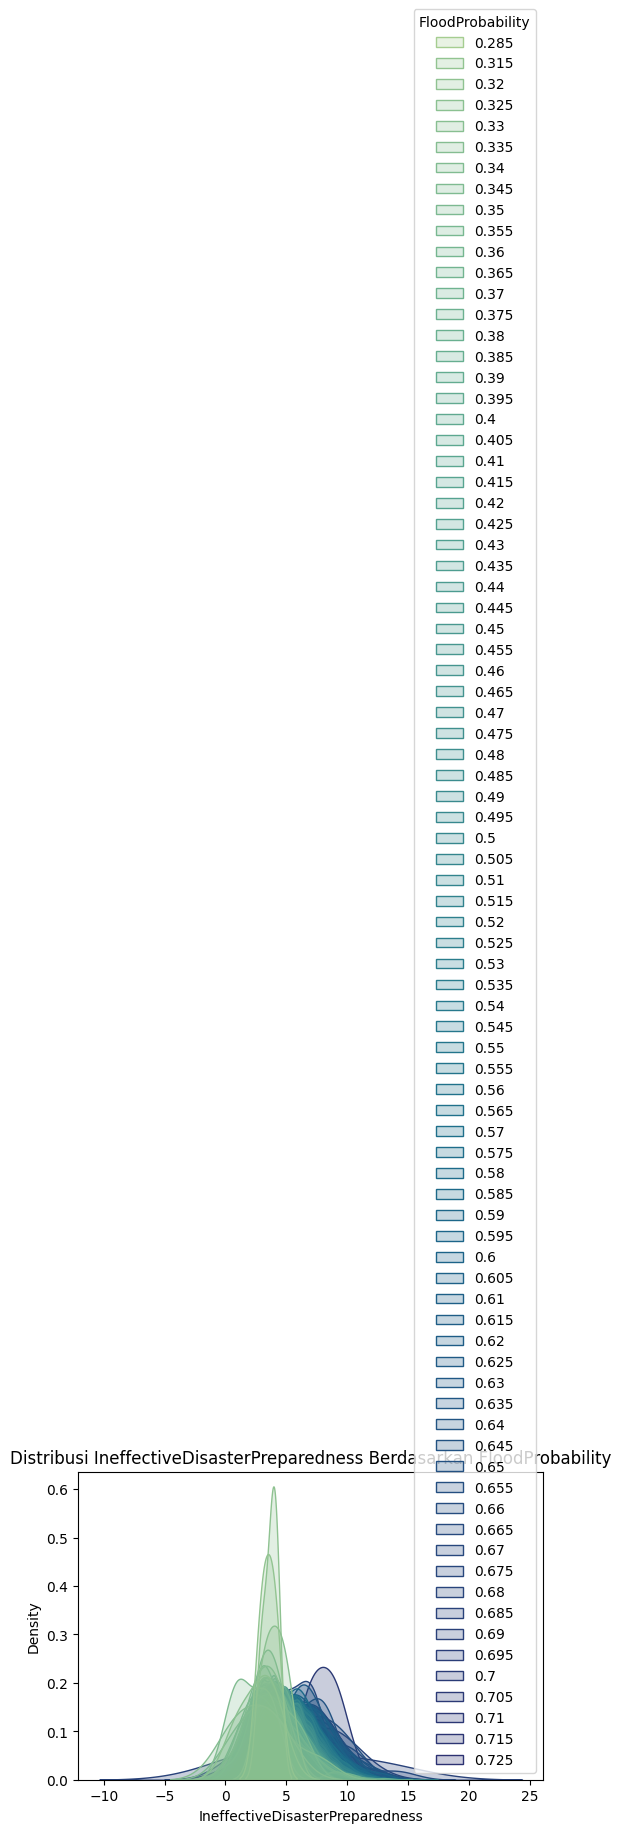

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


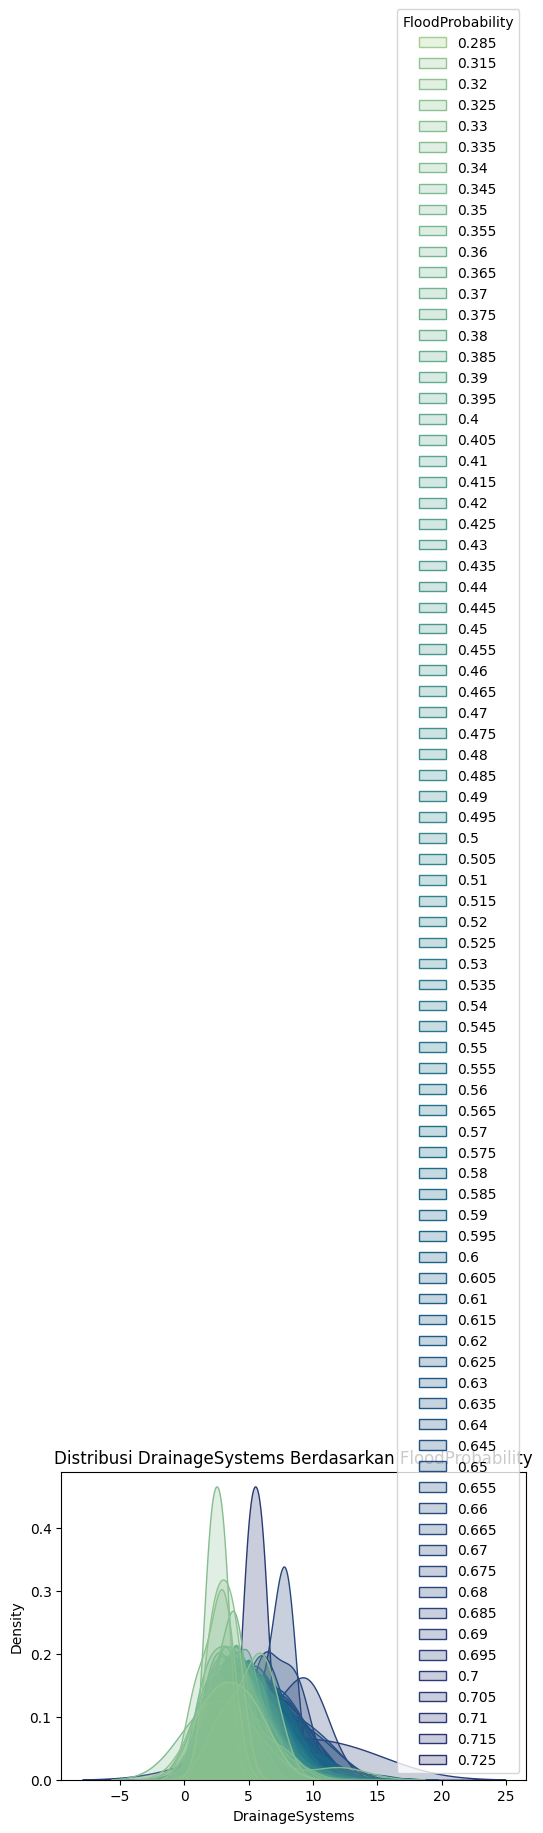

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


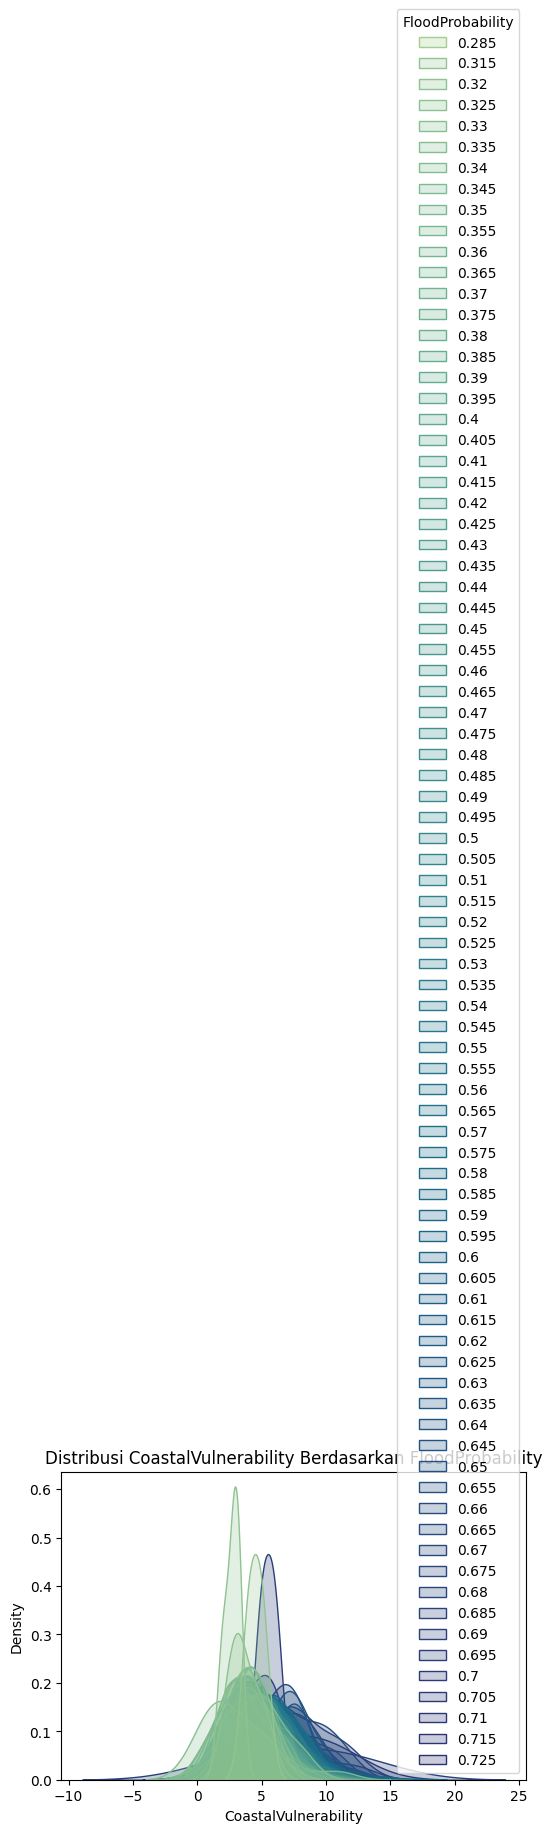

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


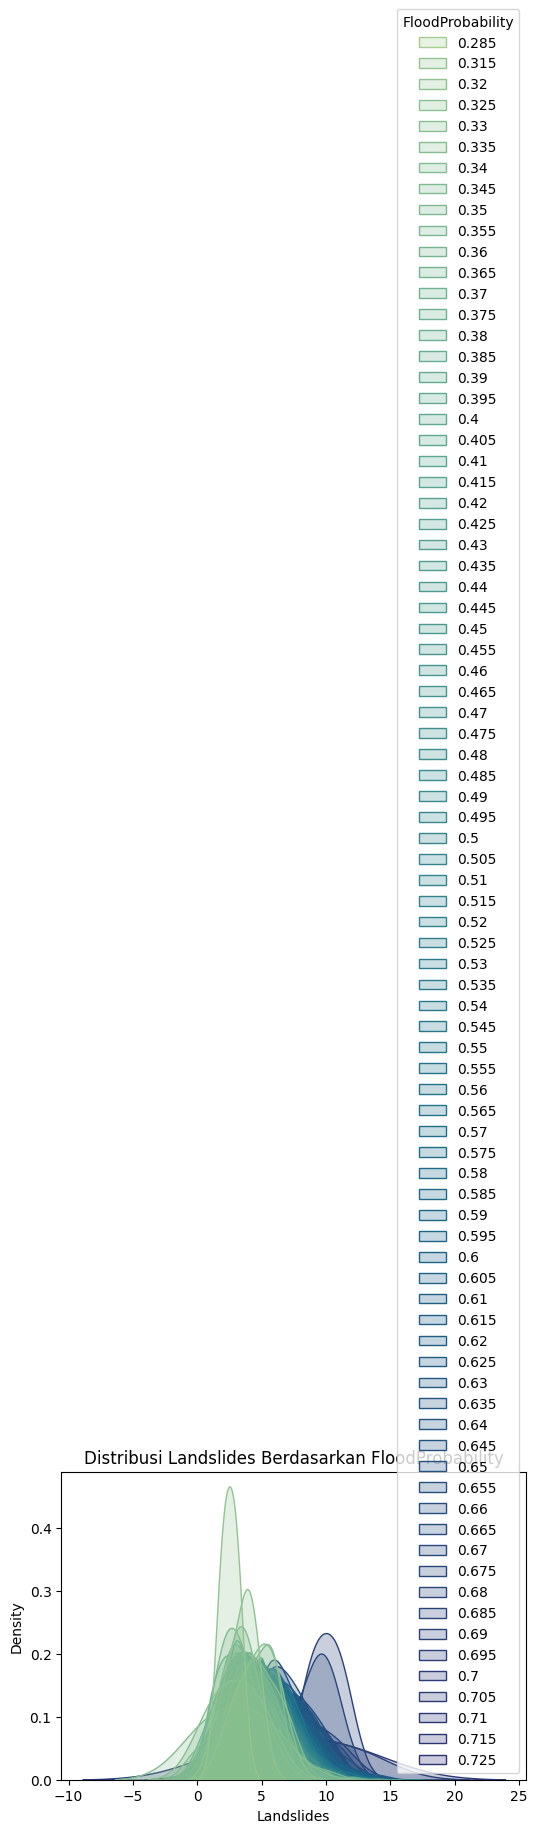

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


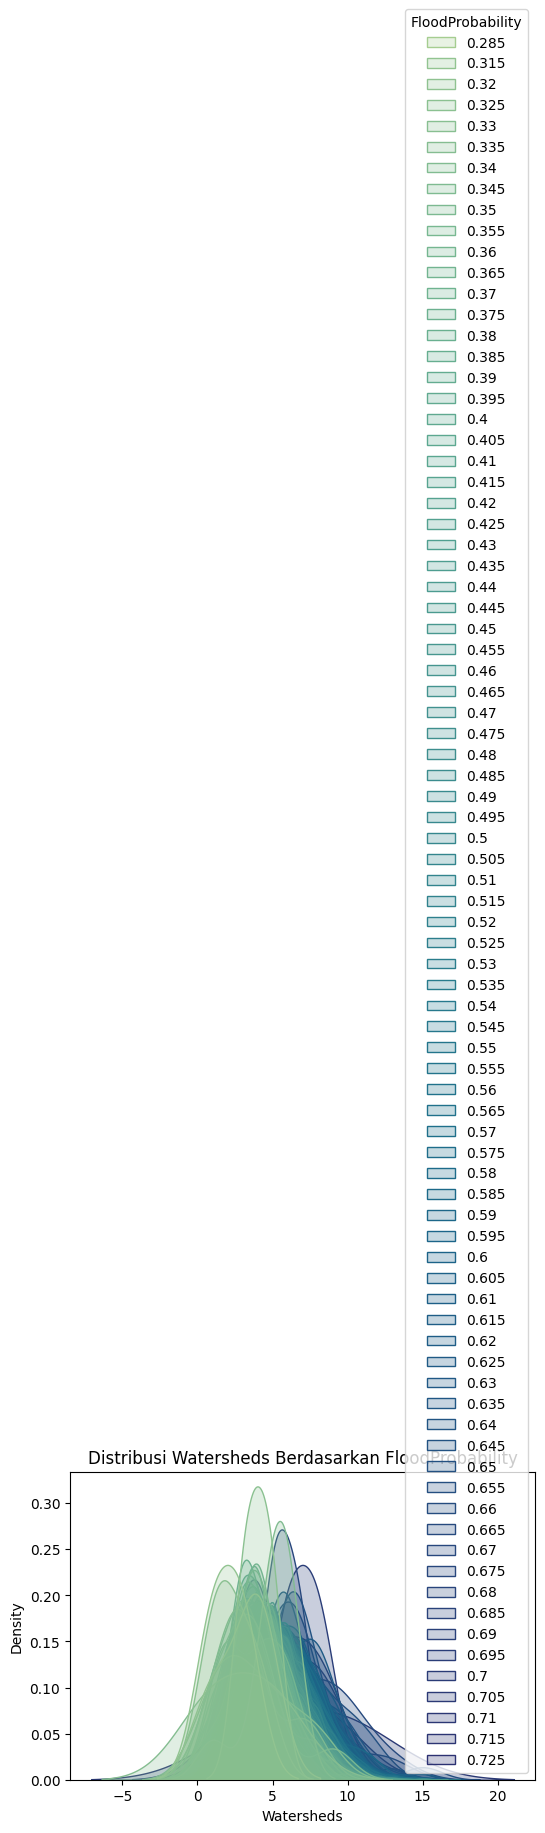

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


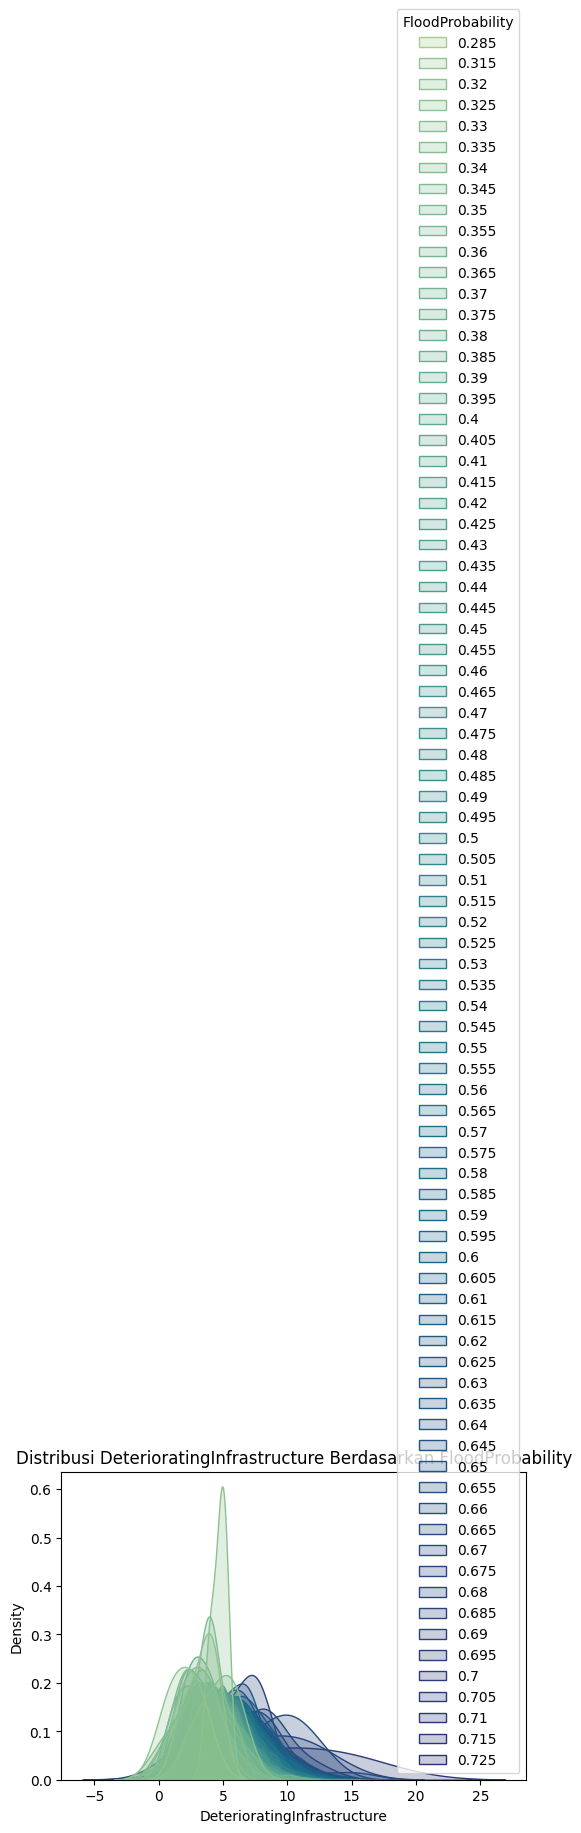

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


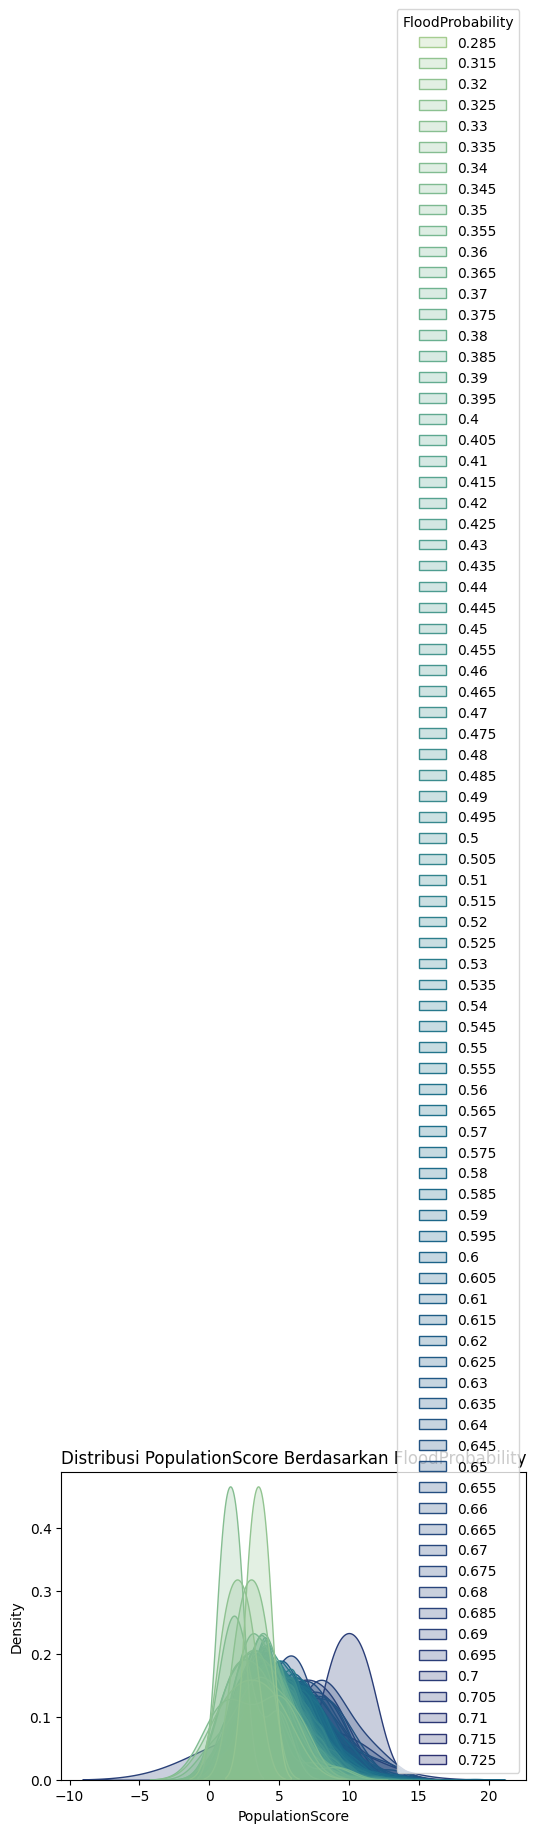

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


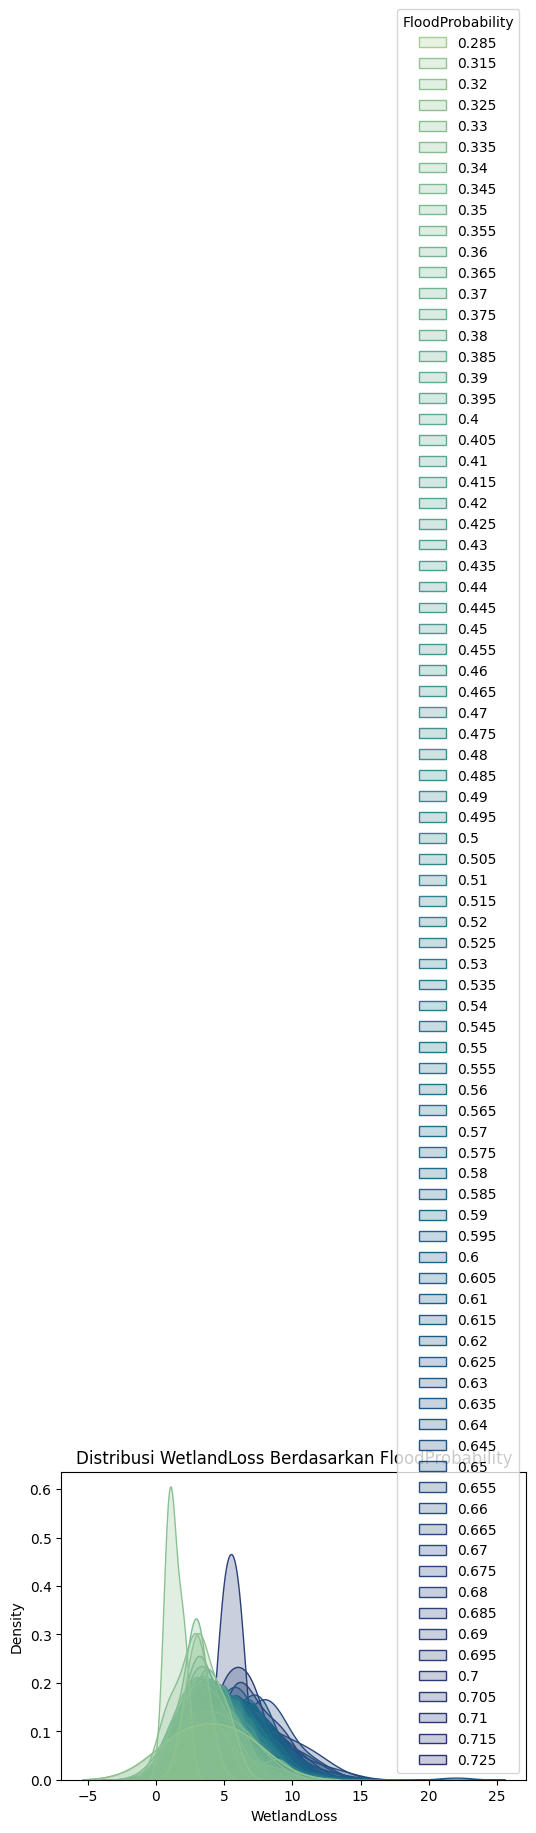

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


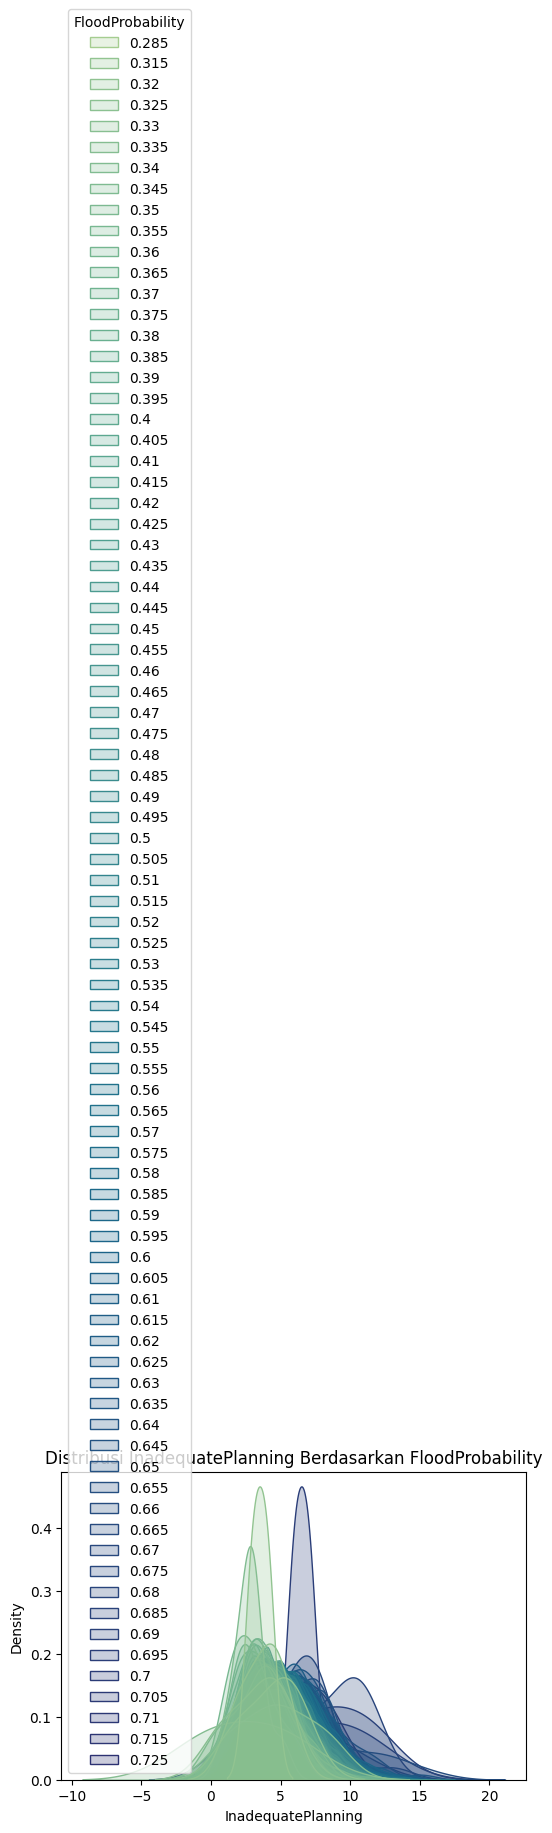

<ipython-input-14-e06a5566f7ec>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')


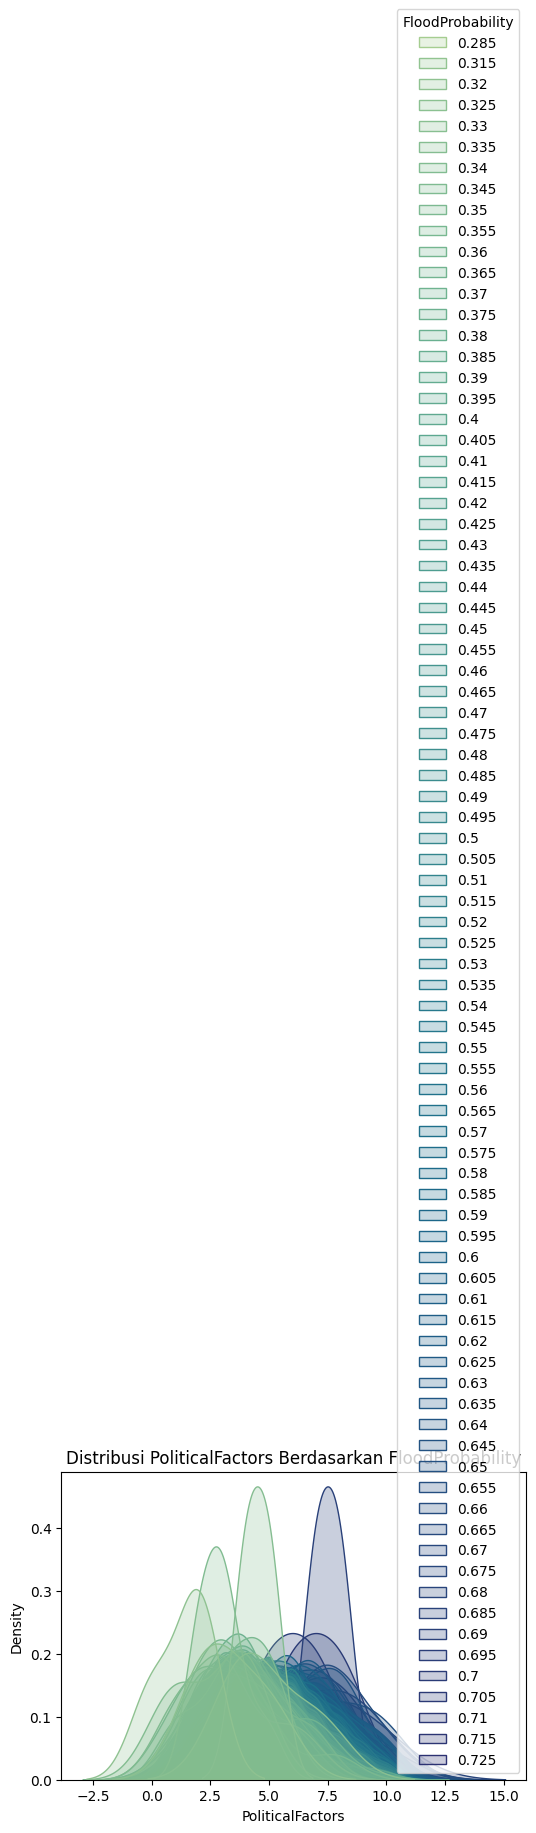

In [14]:
# Mebuat plot perbandingan statistik fitur per kelas
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="FloodProbability", fill=True, common_norm=False, palette='crest')
    plt.title(f'Distribusi {col} Berdasarkan FloodProbability')
    plt.show()


### **2.2.9 Skewness dan Kurtosis**

In [15]:
# Mengecheck Skewness dan Kurtosis
print("Skewness dan Kurtosis:")
for col in num_cols:
    print(f"{col}: Skew={skew(df[col]):.2f}, Kurtosis={kurtosis(df[col]):.2f}")


Skewness dan Kurtosis:
MonsoonIntensity: Skew=0.44, Kurtosis=0.16
TopographyDrainage: Skew=0.47, Kurtosis=0.21
RiverManagement: Skew=0.43, Kurtosis=0.19
Deforestation: Skew=0.45, Kurtosis=0.24
Urbanization: Skew=0.47, Kurtosis=0.30
ClimateChange: Skew=0.45, Kurtosis=0.21
DamsQuality: Skew=0.44, Kurtosis=0.16
Siltation: Skew=0.46, Kurtosis=0.22
AgriculturalPractices: Skew=0.43, Kurtosis=0.15
Encroachments: Skew=0.46, Kurtosis=0.21
IneffectiveDisasterPreparedness: Skew=0.44, Kurtosis=0.14
DrainageSystems: Skew=0.46, Kurtosis=0.25
CoastalVulnerability: Skew=0.46, Kurtosis=0.23
Landslides: Skew=0.43, Kurtosis=0.13
Watersheds: Skew=0.47, Kurtosis=0.25
DeterioratingInfrastructure: Skew=0.44, Kurtosis=0.16
PopulationScore: Skew=0.46, Kurtosis=0.24
WetlandLoss: Skew=0.44, Kurtosis=0.22
InadequatePlanning: Skew=0.46, Kurtosis=0.21
PoliticalFactors: Skew=0.21, Kurtosis=-0.42


**Insight:**

**Skewness(Kemencengan Data)**

Hampir semua variabel memiliki skewness antara 0.43 – 0.47 → artinya distribusi mereka sedikit miring ke kanan (positif skew).

Ini menunjukkan bahwa:
- Mayoritas nilai-nilai pada fitur tersebut cenderung kecil, tapi ada beberapa nilai tinggi (ekstrem).
- Variabel-variabel ini memiliki sejumlah kecil kondisi ekstrem yang bisa memperbesar risiko banjir.
- PoliticalFactors satu-satunya variabel dengan skewness rendah (0.21) → mendekati simetris.

**Kurtosis(Ketajaman Distribusi)**
- Sebagian besar variabel memiliki kurtosis antara 0.13 – 0.30 → sedikit lebih tajam dari normal, tapi tidak ekstrem.
- PoliticalFactors satu-satunya variabel dengan kurtosis negatif (-0.42) → distribusinya lebih datar dari normal (lebih tersebar merata, tidak banyak outlier).
- Variabel-variabel lain menunjukkan adanya sedikit outlier, tapi tidak terlalu mencolok.



### **2.2.10 Feature Correlation dengan Target**


Korelasi Fitur dengan FloodProbability:
DeterioratingInfrastructure        0.230613
TopographyDrainage                 0.229740
RiverManagement                    0.229221
DamsQuality                        0.228623
Watersheds                         0.228576
Siltation                          0.227791
PopulationScore                    0.227524
IneffectiveDisasterPreparedness    0.225225
MonsoonIntensity                   0.224848
InadequatePlanning                 0.224262
WetlandLoss                        0.223892
AgriculturalPractices              0.222820
Landslides                         0.222471
Urbanization                       0.222156
ClimateChange                      0.221796
Deforestation                      0.220402
Encroachments                      0.219620
DrainageSystems                    0.217984
CoastalVulnerability               0.216488
PoliticalFactors                   0.213768
Name: FloodProbability, dtype: float64


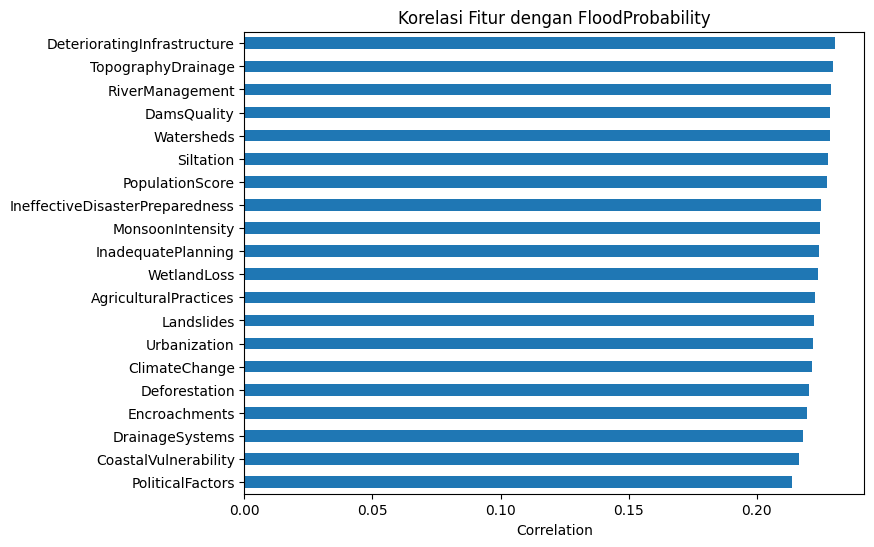

In [16]:
# Mencari Korelasi Fitur Dengan Target
correlation_with_target = df.corr()['FloodProbability'].drop('FloodProbability')
print("\nKorelasi Fitur dengan FloodProbability:")
print(correlation_with_target.sort_values(ascending=False))

correlation_with_target.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Korelasi Fitur dengan FloodProbability")
plt.xlabel("Correlation")
plt.show()


**Insight:**

**Fitur Paling Berkorelasi dengan Banjir (Top 5):**
DeterioratingInfrastructure	0.2306
TopographyDrainage	0.2297
RiverManagement	0.2292
DamsQuality	0.2286
Watersheds	0.2286

Insight: Infrastruktur yang buruk, manajemen sungai, kualitas bendungan, dan kondisi topografi berkaitan dengan peningkatan risiko banjir. Artinya, faktor-faktor ini bisa menjadi fokus utama dalam pencegahan banjir.


**Fitur dengan Korelasi Relatif Rendah (Bottom 5):**
DrainageSystems	0.2180
CoastalVulnerability	0.2165
PoliticalFactors	0.2138

Insight: Faktor-faktor seperti politik atau kerentanan pesisir memiliki hubungan yang lebih lemah dengan probabilitas banjir dalam dataset ini. Bukan berarti tidak penting, tapi mungkin lebih kontekstual atau tidak linier.

## **3. Data Preparation**

### **3.1 Train-Test Split Data**

In [17]:
# Binarisasi target dimana FloodProbability menjadi FloodLabel (0 atau 1)
df['FloodLabel'] = (df['FloodProbability'] > 0.5).astype(int)
# Split fitur dan label
X = df.drop(['FloodProbability', 'FloodLabel'], axis=1)
y = df['FloodLabel']

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **3.2 Standarisasi**

In [18]:
# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **4. Model Development**

### **4.1 Decision Tree**


Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      5151
           1       0.69      0.65      0.67      4705

    accuracy                           0.69      9856
   macro avg       0.69      0.69      0.69      9856
weighted avg       0.69      0.69      0.69      9856



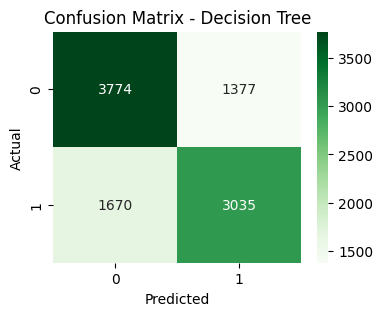

In [19]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]

print("\nDecision Tree")
print("Classification Report:")
print(classification_report(y_test, y_pred_dtree))

acc_dtree = accuracy_score(y_test, y_pred_dtree)
auc_dtree = roc_auc_score(y_test, y_prob_dtree)

# Membuat Plot Decision Tree
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **4.2 SVC (Support Vector Classifier)**


Support Vector Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5151
           1       0.99      0.99      0.99      4705

    accuracy                           0.99      9856
   macro avg       0.99      0.99      0.99      9856
weighted avg       0.99      0.99      0.99      9856



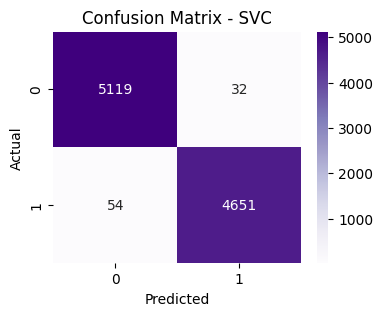

In [20]:
# SVC
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("\nSupport Vector Classifier")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Membuat Plot SVM
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### **4.3 Random Forest**


Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5151
           1       0.93      0.83      0.88      4705

    accuracy                           0.89      9856
   macro avg       0.90      0.89      0.89      9856
weighted avg       0.89      0.89      0.89      9856



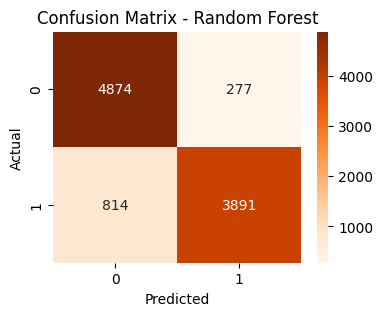

In [21]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Membuat Plot Random Forest
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Perbandingan Setiap Model


=== Model Performance Comparison ===
           Model  Accuracy       AUC
2            SVM  0.991274  0.999690
1  Random Forest  0.889306  0.968672
0  Decision Tree  0.690848  0.688866


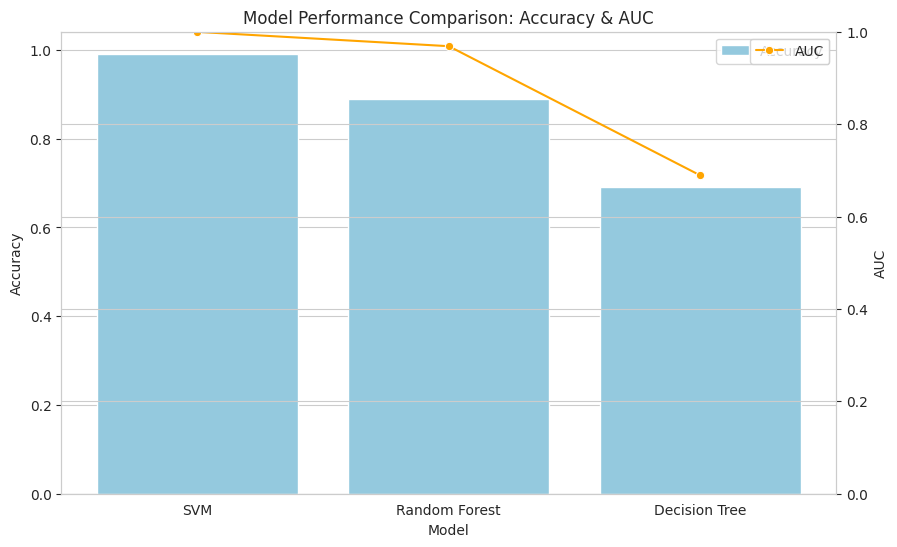

In [22]:
results_df = pd.DataFrame([
    {'Model': 'Decision Tree', 'Accuracy': acc_dtree, 'AUC': auc_dtree},
    {'Model': 'Random Forest', 'Accuracy': acc_rf, 'AUC': auc_rf},
    {'Model': 'SVM', 'Accuracy': acc_svm, 'AUC': auc_svm}
]).sort_values(by='Accuracy', ascending=False)


print("\n=== Model Performance Comparison ===")
print(results_df)

# Visualisasi Accuracy dan AUC dengan barplot berdampingan
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=results_df, color='skyblue', label='Accuracy')

# Plot AUC dengan axis kedua
ax2 = plt.twinx()
sns.lineplot(x='Model', y='AUC', data=results_df, sort=False, marker='o', color='orange', label='AUC', ax=ax2)
ax2.set_ylim(0, 1)

plt.title('Model Performance Comparison: Accuracy & AUC')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#### **Model Terbaik: Support Vector Machine (SVM)**

Alasan Mengapa SVM Terbaik:
1. Akurasi Tertinggi (99.13%)
Ini berarti bahwa 99.13% dari prediksi SVM terhadap data uji cocok dengan label yang sebenarnya. Ini jauh lebih tinggi dibanding Random Forest (89.69%) dan Decision Tree (68.94%).

2. AUC Tertinggi (0.9997)
AUC (Area Under Curve) mendekati 1 menunjukkan bahwa model SVM sangat baik dalam membedakan antara kelas banjir (1) dan tidak banjir (0). AUC setinggi ini menunjukkan performa yang nyaris sempurna.

3. Model yang Lebih General
SVM cenderung lebih stabil dan tidak mudah overfitting jika dibandingkan dengan Decision Tree. Bahkan ketika dibandingkan dengan Random Forest (yang juga merupakan ensemble dari banyak decision tree), SVM masih lebih unggul dalam dataset ini.



**Kesimpulan**
Model Support Vector Machine (SVM) merupakan model terbaik untuk klasifikasi kejadian banjir dalam studi ini karena memberikan hasil akurasi dan AUC tertinggi, serta menunjukkan kemampuan yang sangat baik dalam membedakan antara dua kelas secara konsisten. Hal ini menunjukkan bahwa SVM mampu menangkap pola yang paling relevan dalam data, bahkan ketika faktor penyebab banjir bersifat kompleks.